In [9]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [4]:
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompletePZHCI2/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompletePZHCI2/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
train_data, test_data = datos['train'], datos['test']

In [7]:
class_names = metadatos.features['label'].names

In [8]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [11]:
# Normalizar los datos (Pasar de 0-255 a 0-1)
def normalize( images, labels ):
  images = tf.cast( images, tf.float32 )
  images /= 255
  return images, labels

# Normalizar los datos de entrenamiento
train_data = train_data.map(normalize)
test_data = test_data.map(normalize)

# Agregar a la cache (usar memoria en lugar de disco, entramiento más rápido)
train_data = train_data.cache()
test_data = test_data.cache()


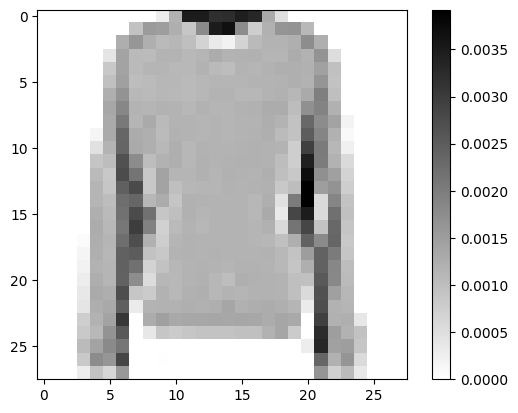

In [16]:
# Mostrar una imagen de los datos de prueba
for image, label in train_data.take(1):
  break

image = image.numpy().reshape((28,28)) # redimensionar imagen

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


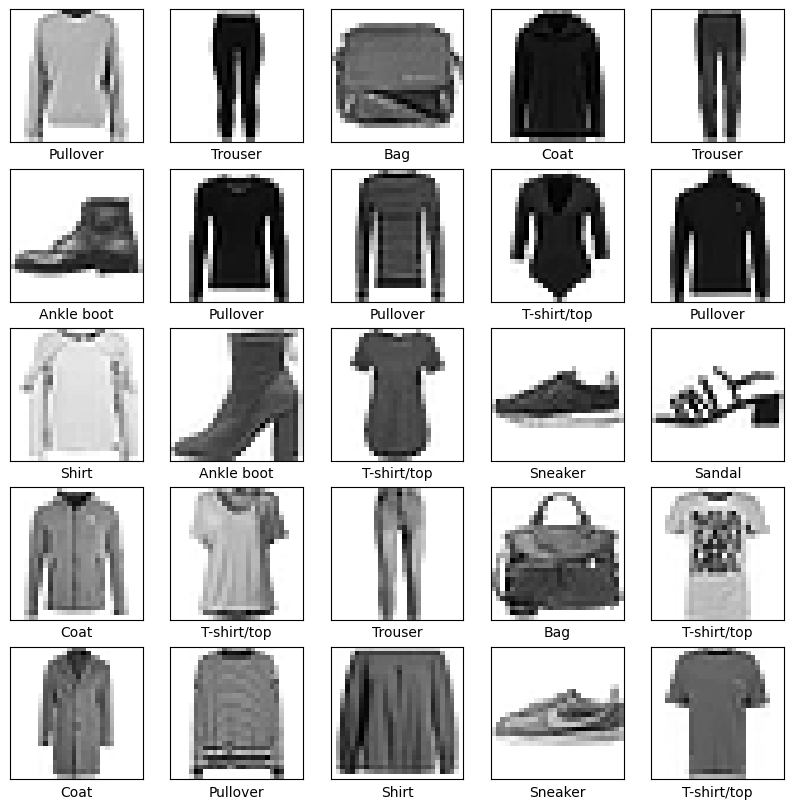

In [17]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_data.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
plt.show()

In [23]:
# Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=(28,28,1) ), # 1 - blanco y negro
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Para redes de clasificacion
])

In [20]:
len_train_data = metadatos.splits['train'].num_examples
len_test_data = metadatos.splits['test'].num_examples

In [21]:
print(len_train_data, len_test_data)

60000 10000


In [24]:
# Compilar modelo
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [22]:
SET_SIZE = 32

train_data = train_data.repeat().shuffle(len_train_data).batch(SET_SIZE)
test_data = test_data.batch(SET_SIZE)

In [26]:
import math

# Entrenar
history = model.fit(
    train_data,
    epochs=5,
    steps_per_epoch=math.ceil(len_train_data/SET_SIZE)
)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0102 - accuracy: 0.6335
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6448 - accuracy: 0.7642
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5573 - accuracy: 0.7995
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5255 - accuracy: 0.8116
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4916 - accuracy: 0.8267


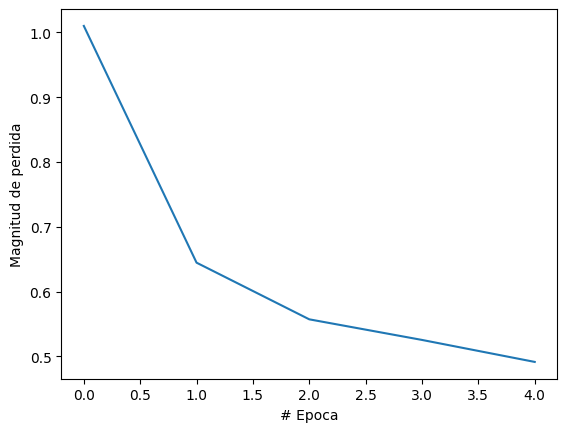

In [27]:
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de perdida')
plt.plot(history.history['loss'])

1/1 [==============================] - 0s 62ms/step


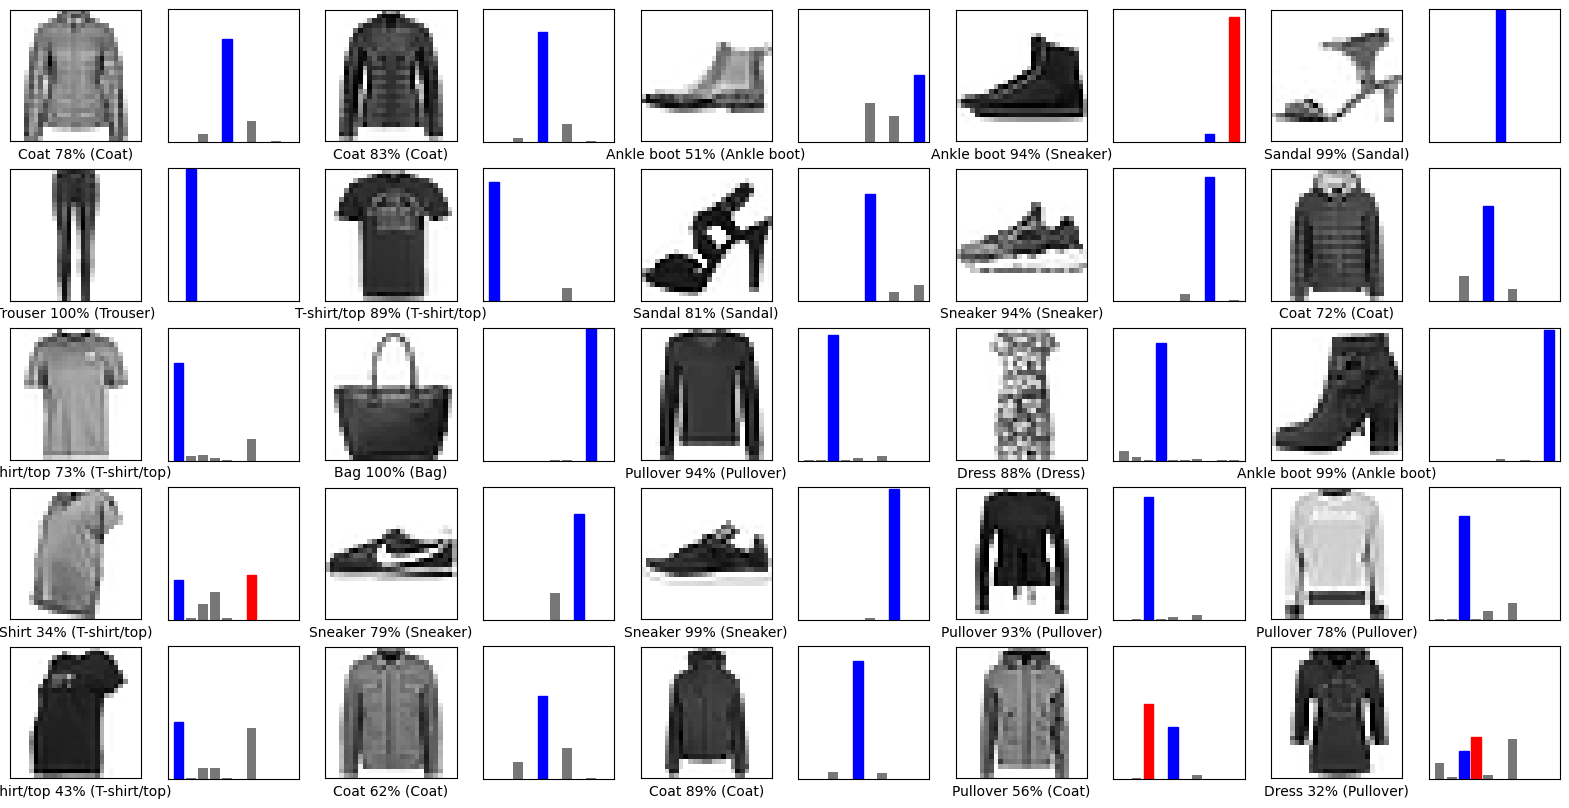

In [39]:
import numpy as np

for test_image, test_label in test_data.take(1):
  test_image = test_image.numpy()
  test_label = test_label.numpy()
  predictions = model.predict(test_image)


def graph_image ( i, arr_predictions, real_labels, images ):
  prediction, label, image = arr_predictions[i], real_labels[i], images[i]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(image[...,0], cmap=plt.cm.binary)

  label_prediction = np.argmax(prediction)
  if label_prediction == label:
    color = 'blue' # Acierto
  else:
    color = 'red' # Fallo

  plt.xlabel('{} {:2.0f}% ({})'.format(
      class_names[label_prediction],
      100*np.max(prediction),
      class_names[label],
      color=color
  ))


def graph_array_value( i, arr_predictions, label ):
  predic, lbl = arr_predictions[i], label[i]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  graph = plt.bar(range(10), predic, color='#777777')
  plt.ylim([0,1])

  prediction_label = np.argmax(predic)

  graph[prediction_label].set_color('red')
  graph[lbl].set_color('blue')


row = 5
col = 5
n_images = row * col

plt.figure(figsize=(2*2*col, 2*row))

for i in range(n_images):
  plt.subplot( row, 2*col, 2*i+1 )
  graph_image( i, predictions, test_label, test_image )
  plt.subplot( row, 2*col, 2*i+2 )
  graph_array_value( i, predictions, test_label )


In [40]:
# Tomar cualquier indice del set de pruebas para ver su prediccion

image = test_image[3]
image = np.array([image])
prediction = model.predict(image)

print('Prediccion: ' + class_names[np.argmax(prediction[0])])

1/1 [==============================] - 0s 43ms/step
Prediccion: Ankle boot
